<a href="https://colab.research.google.com/github/Codassah/Azubi_assessment-Esther/blob/main/EDA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

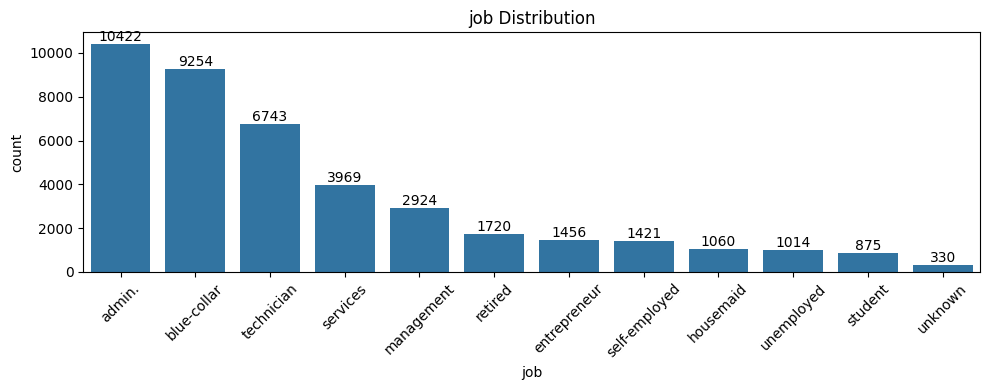

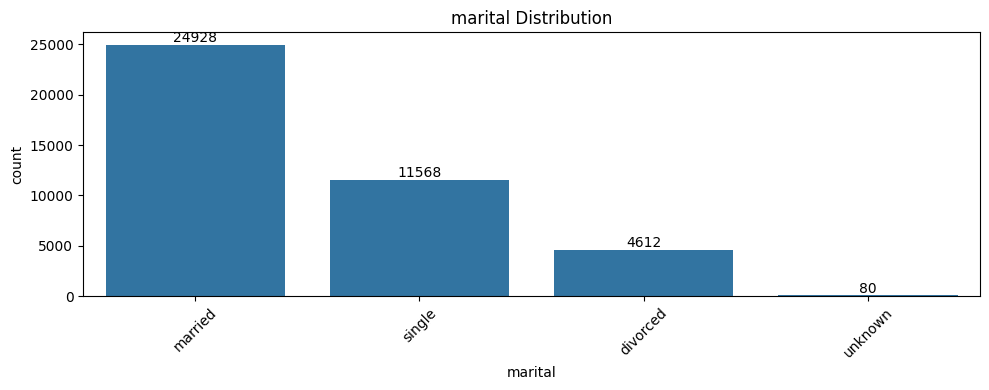

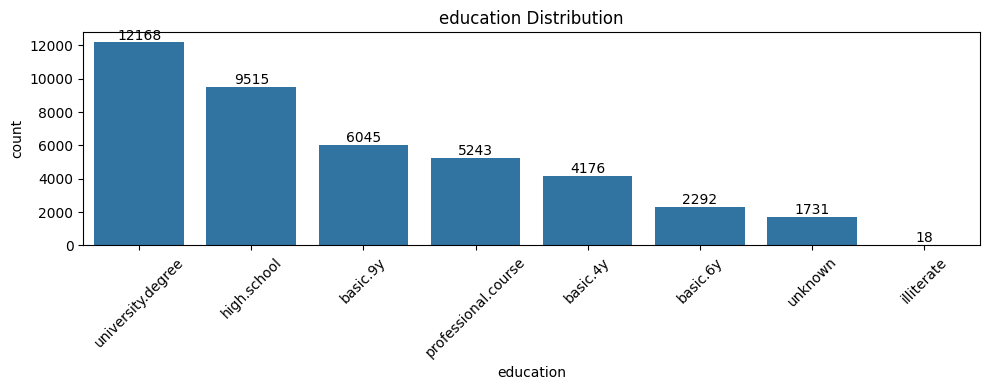

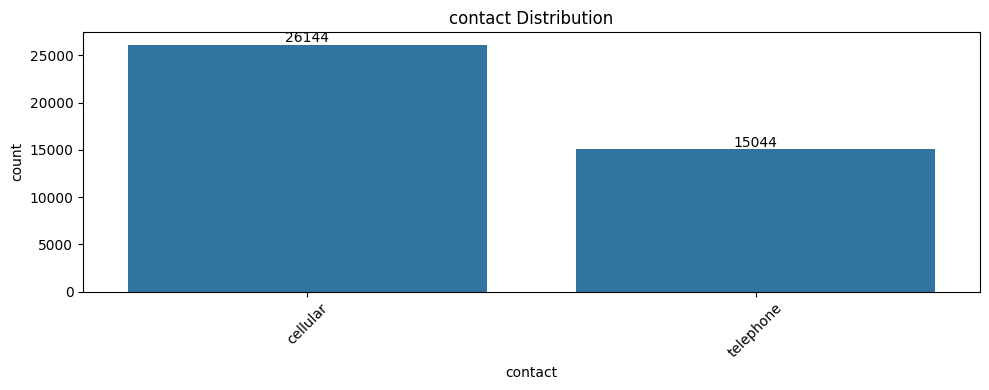

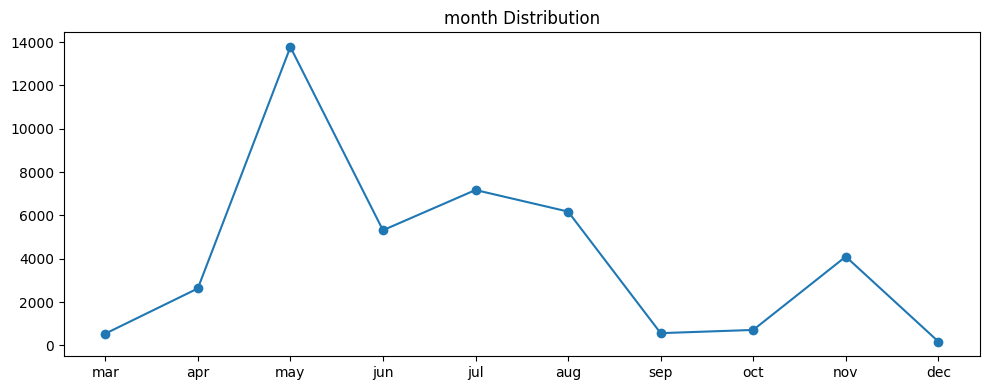

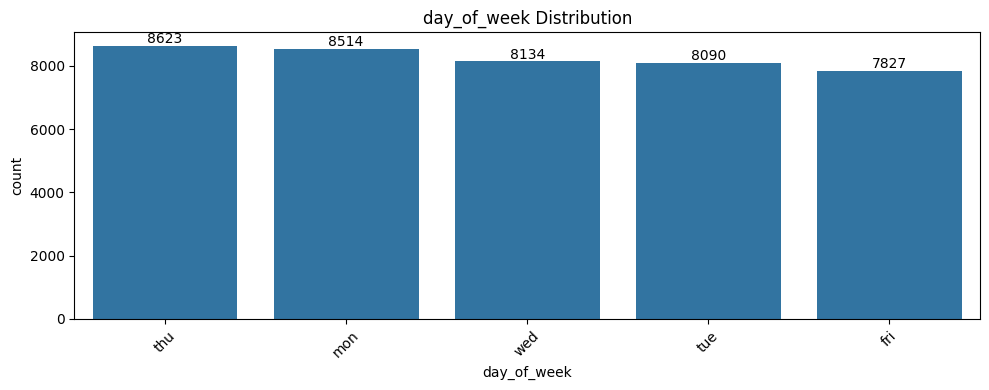

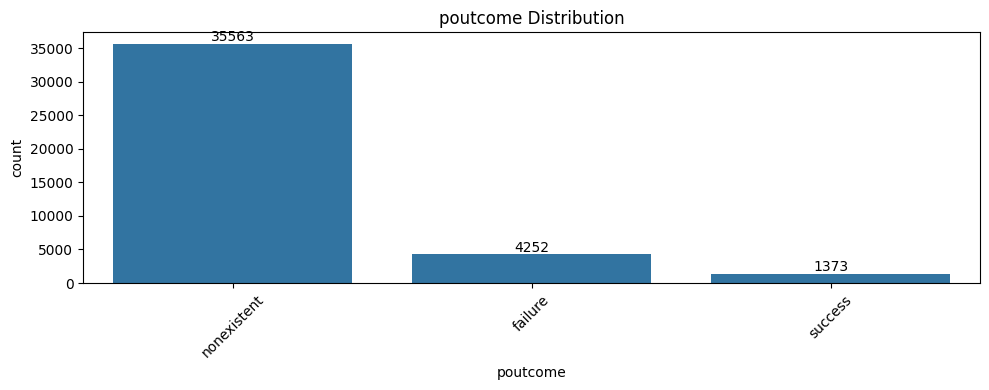

In [7]:
#Importing libraries
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("bank-additional-full.csv", sep=';')
df.head()

# Checking for info and missing values
df.info()
df.isnull().sum()
df.describe()

#Checking and confirming columns
print(df.columns)

# Target variable distribution
sns.countplot(x='y', data=df)
plt.title('Subscription Distribution')
plt.show()

print(df["y"].value_counts(normalize=True))

# Display a correlation heatmap of the numeric variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

#Understanding categorical feature (Job, Marital, ...etc)
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']

for feature in categorical_features:
    plt.figure(figsize=(10,4))

    if feature == 'month':
        # Natural month order
        month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        month_counts = df[feature].value_counts().reindex(month_order)
        plt.plot(month_counts.index, month_counts.values, marker='o')
        plt.title(f'{feature} Distribution')
    else:
        ax = sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
        plt.title(f'{feature} Distribution')
        plt.xticks(rotation=45)

        # Add value labels on top of each bar
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center',
                        xytext=(0, 5),
                        textcoords='offset points')

    plt.tight_layout()
    plt.show()

# Pivot Table: Marital vs Job for only subscribers
pivot1 = df[df['y'] == 'yes'].pivot_table(index='marital', columns='job', values='y', aggfunc='count', fill_value=0)

# Visualize as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot1, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Subscription Counts: Marital Status vs Job (Only Subscribed Clients)')
plt.ylabel('Marital Status')
plt.xlabel('Job')
plt.tight_layout()
plt.show()

# Pivot Table: Housing vs Education for only subscribers
pivot2 = df[df['y'] == 'yes'].pivot_table(index='housing', columns='education', values='y', aggfunc='count', fill_value=0)

# Visualize as heatmap
plt.figure(figsize=(10,5))
sns.heatmap(pivot2, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Subscription Counts: Housing Loan vs Education (Only Subscribed Clients)')
plt.ylabel('Housing Loan')
plt.xlabel('Education Level')
plt.tight_layout()
plt.show()

# Calculate subscription rate per contact type
contact_rates = df.groupby('contact')['y'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100

# Plot
contact_rates.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Subscription Rate by Contact Type (%)')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Contact Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Subscription rate by month
month_order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
monthly_rate = df.groupby('month')['y'].value_counts(normalize=True).unstack().fillna(0)['yes'] * 100

# Plot
monthly_rate = monthly_rate[month_order]
monthly_rate.plot(kind='line', marker='o', color='orange')
plt.title('Subscription Rate by Month')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Stacked bar chart
poutcome_counts = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
poutcome_counts[['no', 'yes']].plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Subscription Rate by Previous Campaign Outcome')
plt.ylabel('Percentage (%)')
plt.xlabel('Previous Outcome')
plt.legend(title='Subscription')
plt.tight_layout()
plt.show()

# Stacked bar chart
poutcome_counts = pd.crosstab(df['poutcome'], df['y'], normalize='index') * 100
poutcome_counts[['no', 'yes']].plot(kind='bar', stacked=True, colormap='Accent')
plt.title('Subscription Rate by Previous Campaign Outcome')
plt.ylabel('Percentage (%)')
plt.xlabel('Previous Outcome')
plt.legend(title='Subscription')
plt.tight_layout()
plt.show()

